In [2]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load dataset using pandas
df = pd.read_csv(r"D:\Documents\Documents\Data_Analytics\internship(CODETECH)\task\task 1\dataset.csv")

# Show first rows
df.head()

,order_id,customer_id,order_item_id,product_id,seller_id,price,shipping_charges,payment_type,payment_installments,payment_value,product_category_name,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,credit_card,1,18.12,housewares,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,credit_card,1,18.12,housewares,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,2.00,housewares,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,2.00,housewares,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,18.59,housewares,sao paulo,SP


In [6]:
# Select important features and create a real copy
df_ml = df[[
    "price",
    "shipping_charges",
    "payment_installments",
    "payment_value",
    "product_category_name",
    "customer_state",
    "payment_type"
]].copy()

In [7]:
# Encode categorical columns safely
le_category = LabelEncoder()
le_state = LabelEncoder()
le_payment = LabelEncoder()

df_ml.loc[:, "product_category_name"] = le_category.fit_transform(df_ml["product_category_name"])
df_ml.loc[:, "customer_state"] = le_state.fit_transform(df_ml["customer_state"])
df_ml.loc[:, "payment_type"] = le_payment.fit_transform(df_ml["payment_type"])

In [8]:
# Split features and target
X = df_ml.drop("payment_type", axis=1)
y = df_ml["payment_type"]

In [9]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Create model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2 Score:", r2)

MAE: 0.5434563202768888
R2 Score: 0.4028039048451625


In [13]:
import pandas as pd

# Get feature importance
importance = model.feature_importances_

# Create DataFrame
feat_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
})

# Sort and show top 5
feat_df = feat_df.sort_values(by="Importance", ascending=False)
print(feat_df.head(5))

                Feature  Importance
2  payment_installments    0.365420
3         payment_value    0.220399
0                 price    0.144250
1      shipping_charges    0.141000
5        customer_state    0.076251


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Split again with 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Train model
model_30 = RandomForestRegressor(n_estimators=100, random_state=42)
model_30.fit(X_train, y_train)

# Predict
y_pred_30 = model_30.predict(X_test)

# Metrics
print("MAE (30% test):", mean_absolute_error(y_test, y_pred_30))
print("R2 Score (30% test):", r2_score(y_test, y_pred_30))

MAE (30% test): 0.5519846790752184
R2 Score (30% test): 0.38713064793943475


In [15]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Metrics
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

Linear Regression MAE: 0.9505815637744888
Linear Regression R2: 0.18066124226003688


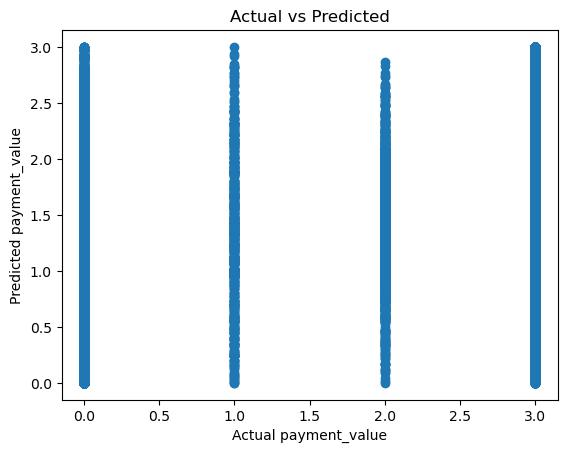

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred_30)
plt.xlabel("Actual payment_value")
plt.ylabel("Predicted payment_value")
plt.title("Actual vs Predicted")
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create HIGH / LOW column
avg_value = df_ml["payment_value"].mean()
df_ml["payment_label"] = df_ml["payment_value"].apply(
    lambda x: "HIGH" if x > avg_value else "LOW"
)

# Features & target
X_cls = df_ml[[
    "price",
    "shipping_charges",
    "payment_installments",
    "product_category_name",
    "customer_state",
    "payment_type"
]]
y_cls = df_ml["payment_label"]

# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)

# Predict
y_pred_c = clf.predict(X_test_c)

# Accuracy
print("Classification Accuracy:", accuracy_score(y_test_c, y_pred_c))

Classification Accuracy: 0.9543535509760481
